### Задания
1. Загрузить данные Market_Basket_Optimisation.csv.

2. Визуализировать данные (отразить на гистограммах относительную и 
фактическую частоту встречаемости для 20 наиболее популярных 
товаров). 

3. Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori).

4. Применить алгоритм FP-Growth из библиотеки fpgrowth_py.

5. Сравнить время выполнения всех алгоритмов и построить гистограмму.

6. Загрузить данные data.csv.

7. Визуализировать данные (отразить на гистограммах относительную и 
фактическую частоту встречаемости для 20 наиболее популярных 
товаров).

8. Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori).

9. Применить алгоритм FP-Growth из библиотеки fpgrowth_py.

10. Сравнить время выполнения всех алгоритмов и построить гистограмму

## Загрузка пакетов и импорт библиотек

In [1]:
import time
import pandas as pd

import matplotlib.pyplot as plt

## Загрузка и обработка данных

In [11]:
df = pd.read_csv('/content/data.csv')
print(df.shape)
df.head(3)

(9530, 12)


,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
products = [df.columns.tolist()[0]]
df.columns = [f'col_{i}' for i in range(1, 13)]
df.head(2)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
products_dict = {}
products.extend([None for i in range(11)])
for i, item in zip(range(1, 13), products):
  products_dict[f'col_{i}'] = item

df = df.append(products_dict, ignore_index=True)

In [15]:
df.head(2)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.isna().sum()

col_1      323
col_2     3691
col_3     6572
col_4     8026
col_5     8935
col_6     9286
col_7     9440
col_8     9495
col_9     9518
col_10    9522
col_11    9527
col_12    9530
dtype: int64

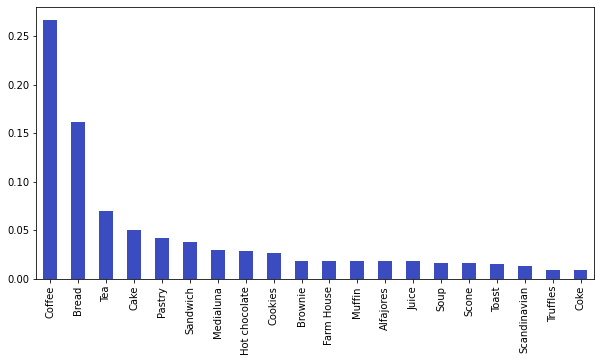

In [17]:
df.stack().value_counts(normalize=True)[:20].plot(kind='bar', figsize=(10, 5), colormap='coolwarm');

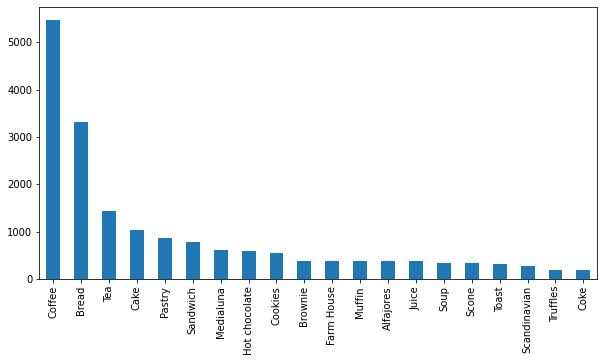

In [18]:
df.stack().value_counts()[:20].plot(kind='bar', figsize=(10, 5), colormap='tab10');

## Реализация алгоритмов ассоциативных правил (ARL)

In [19]:
transactions = []
for i in range(df.shape[0]):
  row = df.iloc[i].dropna().tolist()
  transactions.append(row)

In [20]:
transactions[0]

['Scandinavian', 'Scandinavian']

### apriori_python

minSup – это минимальная поддержка

minConf – минимальная достоверность

In [21]:
!pip install --quiet apriori_python

In [22]:
from apriori_python import apriori

In [23]:
t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup = 0.04, minConf = 0.33)
time1 = time.perf_counter() - start
t.append(time1)

In [24]:
rules

[[{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037]]

### apyori

In [25]:
!pip install --quiet apyori

In [26]:
from apyori import apriori

In [27]:
start = time.perf_counter()
lift = 1 + 1e-20

rules = apriori(transactions, minSup = 0.02, minConf = 0.04, min_lift=lift)
time2 = time.perf_counter() - start
t.append(time2)

In [28]:
rules = list(rules)
for rule in rules:
  for subset in rule[2]:
    print(subset[0], subset[1])
    print('Support: {0}; Confidence: {1}; Lift: {2}'.format(rule[1], subset[2], subset[3]))
    print('----------------------------------------------------------------------------')

frozenset() frozenset({'Bread'})
Support: 0.3249396705487357; Confidence: 0.3249396705487357; Lift: 1.0
----------------------------------------------------------------------------
frozenset() frozenset({'Cake'})
Support: 0.10313713146574337; Confidence: 0.10313713146574337; Lift: 1.0
----------------------------------------------------------------------------
frozenset() frozenset({'Coffee'})
Support: 0.4750813136082258; Confidence: 0.4750813136082258; Lift: 1.0
----------------------------------------------------------------------------
frozenset() frozenset({'Tea'})
Support: 0.141643059490085; Confidence: 0.141643059490085; Lift: 1.0
----------------------------------------------------------------------------


Все правила получились независимыми.

### efficient_apriori

In [29]:
!pip install --quiet efficient_apriori

In [31]:
from efficient_apriori import apriori

In [32]:
start = time.perf_counter()

itemsets, rules = apriori(transactions, min_support=0.03, min_confidence=0.33)
time3 = time.perf_counter() - start
t.append(time3)

In [33]:
for i in range(len(rules)):
  print(rules[i])

{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.219)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.121, conv: 1.122)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)


### fpgrowth_py

In [34]:
!pip install --quiet fpgrowth_py

In [35]:
from fpgrowth_py import fpgrowth

In [36]:
start = time.perf_counter()

itemsets, rules = fpgrowth(transactions, minSupRatio=0.03, minConf=0.33)
time4 = time.perf_counter() - start
t.append(time4)

In [37]:
for i in range(len(rules)):
  print(rules[i])

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Bread'}, 0.33865030674846625]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]


## Время выполнения алгоритмов

Время выполнения алгоритмов apriori:
apriori_python: 0.357488146000037
apyori: 0.00013167999998131563
efficient_apriori: 0.02120766600000934
Время выполнения алгоритма fpgrowth:
fpgrowth_py: 0.24335000100001025


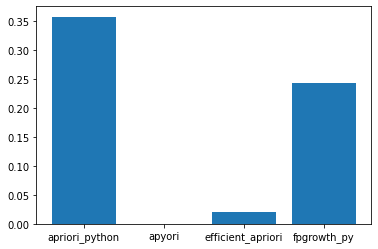

In [38]:
print('Время выполнения алгоритмов apriori:')
print(f'apriori_python: {t[0]}')
print(f'apyori: {t[1]}')
print(f'efficient_apriori: {t[2]}')
print('Время выполнения алгоритма fpgrowth:')
print(f'fpgrowth_py: {t[3]}')

plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth_py'], t)
plt.show()